# We Rate Dogs Data Wrangling & Visualization


## Table of Contents
<ul>
<li> Load Libraries</li>
<li> Gather the Data</li><ul>
<li>Twitter Archive</li>
<li>Image Predictions</li>
<li>Twitter API</li></ul>
<li> Assess the Data</li><ul>
<li>archive table</li>
<li> predictions table</li>
<li>tweet_ids table</li>
<li>Quality</li>
<li> Tidiness</li></ul>
<li> Clean the Data</li>
<li> Storing & Analysis </li>
<li>  Visualization  </li>
</ul>

# Importing  libraries

In [65]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Gather


## Twitter archive

In [66]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

## Image Predictions Data


In [67]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

## Twitter API

In [ ]:
#from tweepy import OAuthHandler
#from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

In [68]:
# create a DataFrame from the tweet-json.txt file:
tweets_data = []
with open('tweet-json.txt', encoding='utf-8') as json_file:  
    for line in json_file:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    
    
print(len(tweets_data))

tweet_ids = pd.DataFrame()
tweet_ids['tweet_id'] = list(map(lambda tweet_ids: tweet_ids.get('id', None),tweets_data))
tweet_ids['favorite_count'] = list(map(lambda tweet_ids: tweet_ids.get('favorite_count', None),tweets_data))
tweet_ids['retweet_count'] = list(map(lambda tweet_ids: tweet_ids['retweet_count'], tweets_data))


2354


# Assess 

## archive table


In [69]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [70]:
archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [71]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [72]:
archive.sample(19)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1830,676219687039057920,NaN,NaN,2015-12-14 01:58:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,None,None,None
1135,728409960103686147,NaN,NaN,2016-05-06 02:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He's a skater pup. He said se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960...,10,10,Wallace,None,None,None,None
518,810657578271330305,NaN,NaN,2016-12-19 01:26:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pavlov. His floatation device has fail...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810657578...,11,10,Pavlov,None,None,None,None
795,773308824254029826,NaN,NaN,2016-09-06 23:56:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bungalo. She uses that face to get wha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,None,None,None
752,778990705243029504,NaN,NaN,2016-09-22 16:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jay. He's really h*ckin happy about th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778990705...,11,10,Jay,None,None,None,None
1893,674752233200820224,NaN,NaN,2015-12-10 00:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674752233...,12,10,None,None,None,None,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
334,832682457690300417,NaN,NaN,2017-02-17 20:05:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,NaN,NaN,NaN,https://twitter.com/telegraph/status/832268302...,13,10,None,None,None,None,None
1850,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None


In [73]:
archive['text'].tail(80) 

2276    Exotic dog here. Long neck. Weird paws. Obsess...
2277    Never seen this breed before. Very pointy pup....
2278              Ermergerd 12/10 https://t.co/PQni2sjPsm
2279    This is Biden. Biden just tripped... 7/10 http...
2280    This is Fwed. He is a Canadian Asian Taylormad...
2281    Here we have a neat pup. Very white. Cool shad...
2282    This is Genevieve. She is a golden retriever c...
2283    This is Joshwa. He is a fuckboy supreme. He cl...
2284    *takes several long deep breaths* omg omg oMG ...
2285    Quite an advanced dog here. Impressively dress...
2286    This is Timison. He just told an awful joke bu...
2287    This is a Dasani Kingfisher from Maine. His na...
2288    These are strange dogs. All have toupees. Long...
2289    This is Clarence. His face says he doesn't wan...
2290    Say hello to Kenneth. He likes Reese's Puffs. ...
2291    This is Churlie. AKA Fetty Woof. Lost eye savi...
2292    This is Bradlay. He is a Ronaldinho Matsuyama ...
2293    This i

## predictions table


In [74]:
image_predictions


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [75]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## tweet_ids table

In [76]:
tweet_ids

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [77]:
tweet_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [78]:
tweet_ids.duplicated().sum()


0

### Quality


#### archive table
<ul>
<li>tweet_id has to be a string dataype.</li>
<li>Timestamp is not a datetime variable.</li>
<li>The source format is incorrect. </li>
<li>The text of a tweet includes urls.</li>
<li>We only want the original Tweets with images, so the columns related to Retweet should be dropped.</li>

</ul>

#### predictions table<ul>
<li>tweet_id  has to be a string dataype.</li>
<li> Inconsistent writing in p1, p2 and p3.</li>
<li>Drop duplicate jpg_url.</li>
<li>Column names are not clearly identified.</li>
</ul>

#### tweet_ids table<ul>
<li>tweet_id has to be a string dataype.</li></ul>

### Tidiness

#### archive table
>Four variables (doggo, floofer, pupper, puppo) should be merged in one column.

>Three dataframes join the inner.


## Clean the Data


In [79]:
# Make copies
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_ids_clean = tweet_ids.copy()

#### 1-Define


Convert timestamp columns to datetime type.



#### Code

In [80]:
archive_clean['timestamp']= pd.to_datetime(archive_clean['timestamp'])

#### Test

In [81]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### 2-Define

Change the source format.

#### Code

In [82]:
archive_clean['source'] = archive_clean['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))

#### Test

In [83]:
archive_clean['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

In [84]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 3-Define

change tweet_id from number to string for all three data sets.

#### Code

In [85]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')
tweet_ids_clean['tweet_id'] = tweet_ids_clean['tweet_id'].astype('str')

#### Test

In [86]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [87]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [88]:
tweet_ids_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### 4-Define


Clean the tweet text  from url.

#### Code


In [89]:
def remove_url(tweet_text):
    #remove URLs
    content = re.sub(r"http\S+", "", tweet_text,flags=re.U)
    return content

In [90]:
archive_clean.text = archive_clean.text.apply(remove_url)


#### Test


In [91]:
archive_clean.text 

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

#### 5-Define

Dropping  retweet rows and unnecessary columns.

#### Code

In [92]:
# drop retweet rows
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isnull()]
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [93]:
# drop columns
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

#### Test

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


#### 6-Define


Merge data of 'doggo', 'floofer', 'pupper', 'puppo' in one column.



#### Code


In [95]:
archive_clean['doggo'].replace('None', '', inplace=True)
archive_clean['floofer'].replace('None', '', inplace=True)
archive_clean['pupper'].replace('None', '', inplace=True)
archive_clean['puppo'].replace('None', '', inplace=True)

In [96]:
archive_clean['stage'] = (archive_clean['doggo'] + 
                                    archive_clean['floofer'] + 
                                    archive_clean['pupper'] + 
                                   archive_clean['puppo'])

In [97]:
archive_clean['stage'].replace('', 'unidentified', inplace=True)


In [98]:
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


In [99]:
archive_clean['stage'].value_counts()


unidentified    1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64


#### Test

In [100]:
archive_clean['stage'].value_counts()


unidentified    1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [101]:
 archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


#### 7-Define

inconsistent writing in p1, p2 and p3.

#### Code

In [102]:
image_predictions_clean['p1'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()


In [103]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')


#### Test

In [104]:
image_predictions_clean.loc[:,['p1', 'p2', 'p3']].sample(5)


,p1,p2,p3
238,Chesapeake Bay Retriever,Chesapeake Bay Retriever,Labrador Retriever
481,Ice Bear,Ice Bear,Kuvasz
1871,Golden Retriever,Golden Retriever,Chihuahua
471,Rotisserie,Rotisserie,Microwave
1453,Dalmatian,Dalmatian,Toy Terrier


#### 8-Define

Drop duplicate.



#### Code

In [105]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [106]:
sum(image_predictions_clean['jpg_url'].duplicated())


0

#### 9-Define


Non-descriptive column names for several variables.


#### Code


In [107]:
image_predictions_clean = image_predictions_clean.rename(columns={'jpg_url': 'image_url',
                                                                  'img_num': 'image_number',
                                                                 'p1': 'top_prediction',
                                                                  'p1_conf': 'top_pred_conf',
                                                                  'p2': 'second_prediction',
                                                                  'p2_conf': 'second_pred_conf',
                                                                  'p3': 'third_prediction',
                                                                  'p3_conf': 'third_pred_conf',
                                                                  'p1_dog': 'is_dog_top_pred',
                                                                  'p2_dog': 'is_dog_sec_pred',
                                                                  'p3_dog': 'is_dog_third_pred',
                                                                 })


#### Test

In [108]:
image_predictions_clean.head()

,tweet_id,image_url,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Collie,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Miniature Pinscher,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Malinois,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Redbone,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Rottweiler,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 10-Define

Combining Datasets

#### Code

In [109]:
df_merge = pd.merge(archive_clean, image_predictions_clean, on=['tweet_id'], how='inner')
df_merge = pd.merge(df_merge, tweet_ids_clean, on = 'tweet_id', how = 'inner' )

#### Test

In [110]:
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 22 columns):
tweet_id              1905 non-null object
timestamp             1905 non-null datetime64[ns]
source                1905 non-null object
text                  1905 non-null object
expanded_urls         1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1905 non-null object
stage                 1905 non-null object
image_url             1905 non-null object
image_number          1905 non-null int64
top_prediction        1905 non-null object
top_pred_conf         1905 non-null float64
is_dog_top_pred       1905 non-null bool
second_prediction     1905 non-null object
second_pred_conf      1905 non-null float64
is_dog_sec_pred       1905 non-null bool
third_prediction      1905 non-null object
third_pred_conf       1905 non-null float64
is_dog_third_pred     1905 non-null bool
favorite_count        1905 non-

## Storing & Analysis 

#### Storing

In [111]:
df_merge.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')


#### Analyzing


In [112]:
df = pd.read_csv('twitter_archive_master.csv')


In [113]:
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,image_url,...,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unidentified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unidentified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,unidentified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,unidentified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,unidentified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,41048,9774


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 22 columns):
tweet_id              1905 non-null int64
timestamp             1905 non-null object
source                1905 non-null object
text                  1905 non-null object
expanded_urls         1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1905 non-null object
stage                 1905 non-null object
image_url             1905 non-null object
image_number          1905 non-null int64
top_prediction        1905 non-null object
top_pred_conf         1905 non-null float64
is_dog_top_pred       1905 non-null bool
second_prediction     1905 non-null object
second_pred_conf      1905 non-null float64
is_dog_sec_pred       1905 non-null bool
third_prediction      1905 non-null object
third_pred_conf       1905 non-null float64
is_dog_third_pred     1905 non-null bool
favorite_count        1905 non-null int6

In [115]:
df.describe()


,tweet_id,rating_numerator,rating_denominator,image_number,top_pred_conf,second_pred_conf,third_pred_conf,favorite_count,retweet_count
count,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000,1.905000e+03,1.905000e+03,1905.000000,1905.000000
mean,7.351929e+17,12.234121,10.493963,1.200525,0.594472,1.340408e-01,5.999813e-02,8344.291339,2529.897638
std,6.777891e+16,42.348950,6.970458,0.556380,0.273276,1.010384e-01,5.088720e-02,11424.176166,4208.543150
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.757066e+17,10.000000,10.000000,1.000000,0.360428,5.300820e-02,1.594270e-02,1878.000000,613.000000
50%,7.076936e+17,11.000000,10.000000,1.000000,0.587764,1.159840e-01,4.947150e-02,3920.000000,1309.000000
75%,7.865960e+17,12.000000,10.000000,1.000000,0.849029,1.948970e-01,9.113280e-02,10384.000000,2938.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


## Visualizing data

#### How many dogs for each stage?

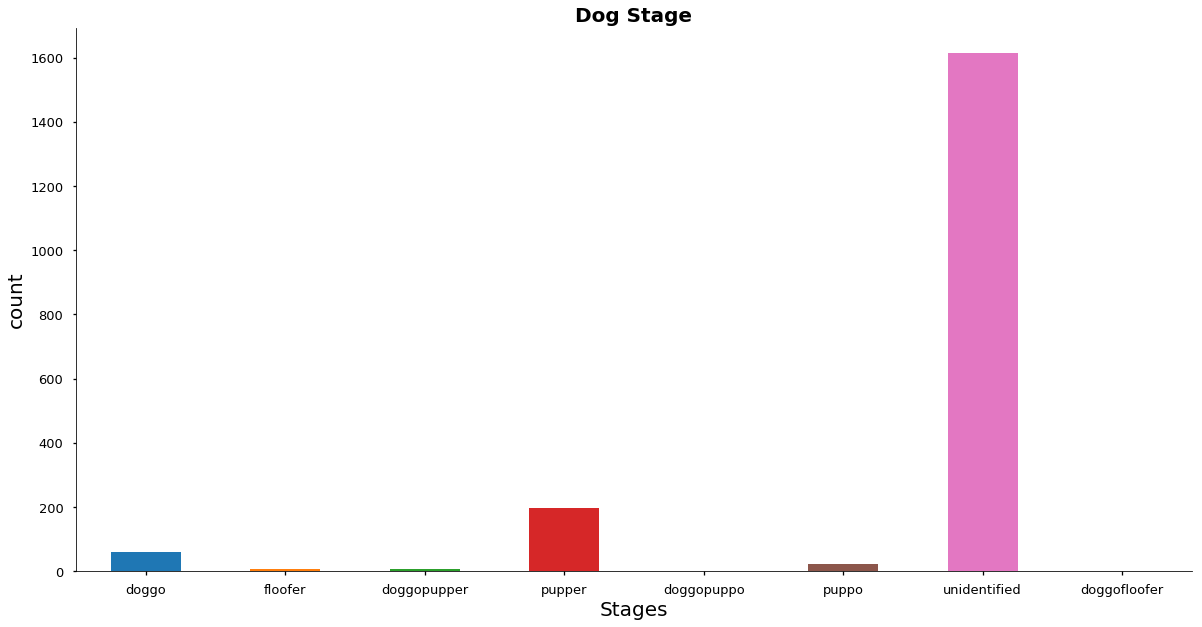

In [116]:
fig, ax = plt.subplots(figsize=(20, 10))
df['stage'].value_counts(sort=False).plot(kind='bar')
ax.set_title('Dog Stage', fontsize=20, fontweight="bold")
ax.set_ylabel('count', fontsize=20)
ax.set_xlabel('Stages', fontsize=20)
plt.xticks(rotation='horizontal') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

>The puppos has the highest counts.


#### Scatter plot between favorites and retweets.

Text(0.5,1,'Retweets and favorites Scatter plot')

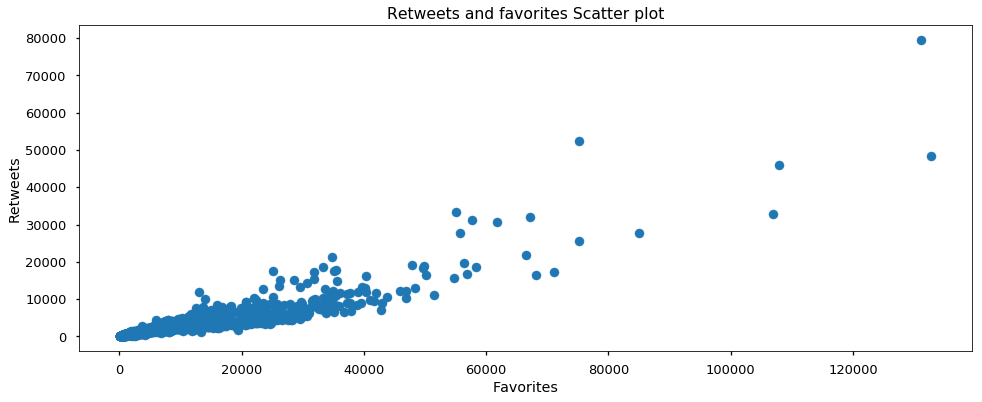

In [118]:
plt.subplots(figsize=(16, 6))
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

## References

<a href="https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column">https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column</a>

<a href="https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/">https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/</a>

<a href="https://bingcs.com/2019/11/30/data-visualization/">https://bingcs.com/2019/11/30/data-visualization/</a>

<a href="https://github.com/NTavou/Wrangle_and_Analyze_Twitter_Data/blob/master/wrangle_act.ipynb">https://github.com/NTavou/Wrangle_and_Analyze_Twitter_Data/blob/master/wrangle_act.ipynb</a>